In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


## Methods & Assumptions

**Data Source:** Medstat.dk (Danish Medicines Agency)
- ATC code: L04AB (TNF-alpha inhibitors)
- Files: all_tnf.xlsx, Etanercept.xlsx, Infliximab.xlsx, Adalimumab.xlsx, Certolizumab pegol.xlsx, Golimumab.xlsx

**Metric:** DDD per 1,000 inhabitants per day
- DDD = Defined Daily Dose (WHO standard)
- Already population-adjusted — differences reflect prescribing patterns, not population size

**Regions:** Hovedstaden, Nordjylland, Midtjylland, Sjælland, Syddanmark, Hele landet (national)

**Time Period:** 1996–2024

**External Sources:**
- Amgros Markedsovervågning Q4 2019 (price data, biosimilar switch)
- Amgros news article: "Ny international rekord i biosimilært skifte" (90% switch, 350m DKK savings)

**Limitations:**
- No line-of-therapy data (cannot determine if first-line or later)
- No diagnosis data (cannot link to specific diseases)
- No patient-level outcomes
- Analysis is descriptive, not causal

In [10]:

# Project folder
folder_place = Path(r"D:\DATA ANALYSIS\Portfolio project\TNF_project")

# Loading function
def load_tnf_file(filename, drug_name):
    """Load and clean a single TNF Excel file from Medstat."""
    path = folder_place / filename
    df = pd.read_excel(
        path,
        skiprows=list(range(8)) + [9],
        skipfooter=7,
        na_values=["-"],
        decimal=","
    )
    df = df.rename(columns={df.columns[0]: "region"})
    df["drug"] = drug_name
    return df

# Loading all 6 files
df_all = load_tnf_file("all_tnf.xlsx", "all_tnf")
df_etanercept = load_tnf_file("Etanercept.xlsx", "etanercept")
df_infliximab = load_tnf_file("Infliximab.xlsx", "infliximab")
df_adalimumab = load_tnf_file("Adalimumab.xlsx", "adalimumab")
df_certolizumab = load_tnf_file("Certolizumab pegol.xlsx", "certolizumab")
df_golimumab = load_tnf_file("Golimumab.xlsx", "golimumab")

# Combining  all into one dataframe
df_combined = pd.concat([df_all, df_etanercept, df_infliximab, df_adalimumab, df_certolizumab, df_golimumab], ignore_index=True)

# Saving cleaned data
df_combined.to_csv(folder_place / "tnf_combined_clean.csv", index=False)

region
Hovedstaden    5.9
Nordjylland    6.5
Midtjylland    6.7
Sjælland       5.4
Syddanmark     5.8
Hele landet    6.0
Name: 2024, dtype: float64
Gap: 24.1%


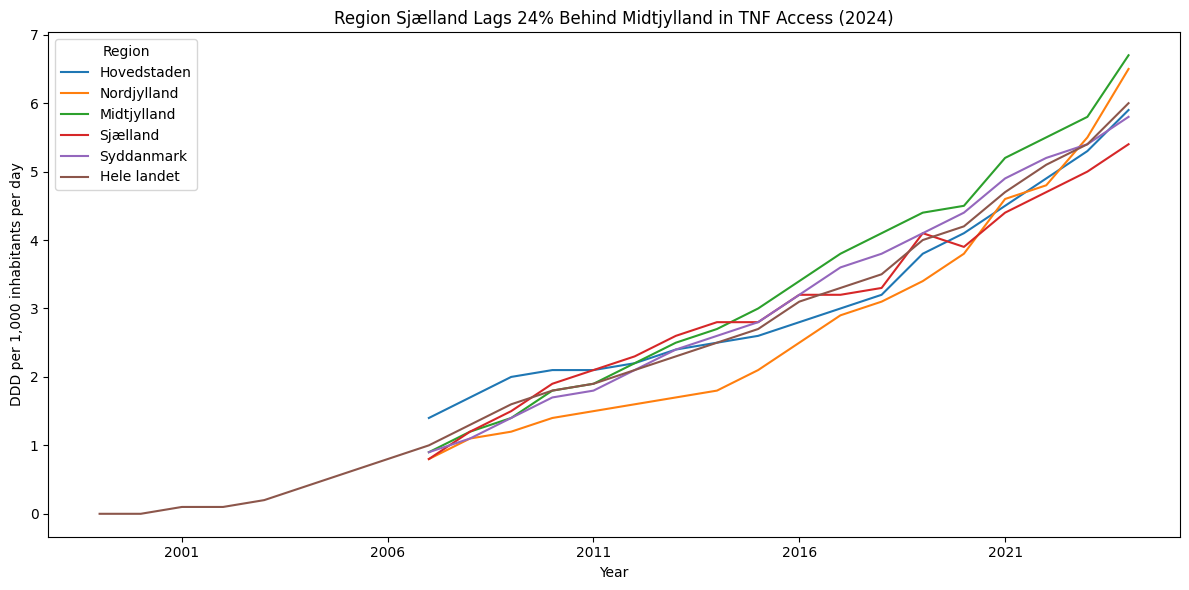

In [11]:
# Calculate regional comparison for 2024
df_2024 = df_combined[df_combined['drug'] == 'all_tnf'].set_index('region')[2024]
print(df_2024)
gap = (df_2024['Midtjylland'] - df_2024['Sjælland']) / df_2024['Sjælland'] * 100
print(f"Gap: {gap:.1f}%")
# Filter to all_tnf only (total TNF, not individual drugs)
df_total = df_combined[df_combined['drug'] == 'all_tnf']
# Transpose: regions as columns, years as rows
df_plot = df_total.set_index('region').drop('drug', axis=1).T
# Plot
df_plot.plot(figsize=(12, 6))
plt.title('Region Sjælland Lags 24% Behind Midtjylland in TNF Access (2024)')
plt.xlabel('Year')
plt.ylabel('DDD per 1,000 inhabitants per day')
plt.legend(title='Region')
plt.tight_layout()
plt.savefig(folder_place / 'tnf_by_region.png')
plt.show()

In [12]:
# Calculate what closing the gap would mean
population_sjaelland = 840_000  # approximate Region Sjælland population
gap_ddd = df_2024['Midtjylland'] - df_2024['Sjælland']  # 1.3 DDD per 1000 per day
# Annual extra DDDs if Sjælland matched Midtjylland
extra_ddd_per_year = gap_ddd * (population_sjaelland / 1000) * 365
print(f"If Sjælland matched Midtjylland: ~{extra_ddd_per_year:,.0f} extra DDDs per year")
print(f"At ~40 kr per DDD (biosimilar price): ~{extra_ddd_per_year * 40 / 1_000_000:,.1f} million DKK additional spending")

If Sjælland matched Midtjylland: ~398,580 extra DDDs per year
At ~40 kr per DDD (biosimilar price): ~15.9 million DKK additional spending


### CHART 1. Region Sjælland Lags 24% Behind Midtjylland in TNF Access (2024)

TNF inhibitor utilisation has grown steadily across all Danish regions since 2007, reflecting broader adoption of biological therapy for autoimmune diseases.

**Key findings (2024)**  
- 24% equity gap: Midtjylland = 6.7 DDD, Sjælland = 5.4 DDD.  
- Data are population-adjusted, so differences reflect prescribing patterns, not population size.  
- Pattern is consistent with known specialist shortages in Region Sjælland.  
- Nordjylland closed the gap: from lowest prescribing region (2007–2015) to 6.5 DDD in 2024, suggesting successful capacity building.

Sjælland emerges as the priority region for targeted capacity expansion or specialist outreach programmes.

**Policy implication**  
If Region Sjælland reached Midtjylland's utilisation level, approximately 398,000 additional DDDs per year would be used, representing ~16 million DKK in additional biologic spending but potentially improved outcomes for undertreated patients.

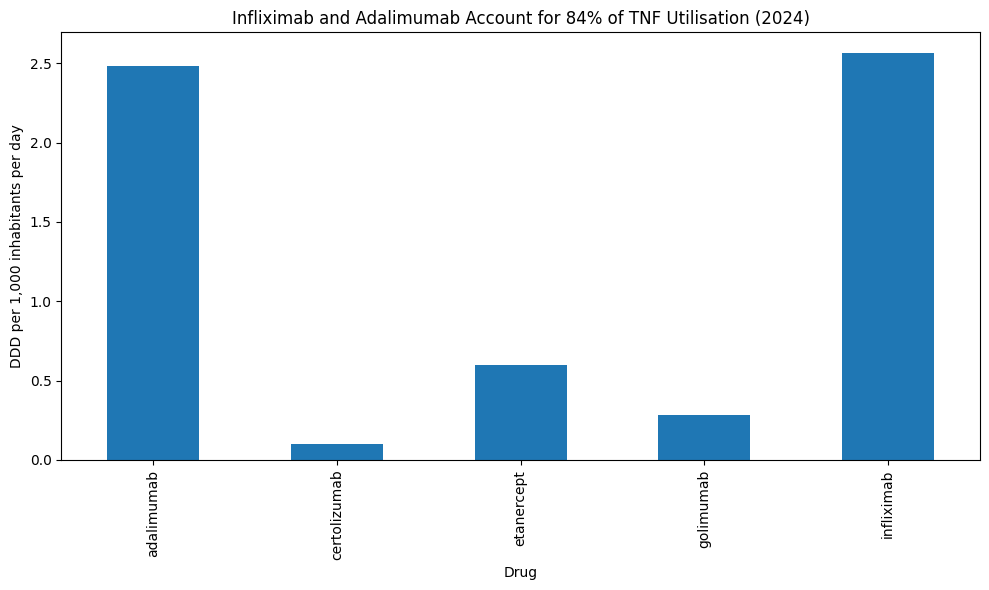

drug
infliximab      2.566667
adalimumab      2.483333
etanercept      0.600000
golimumab       0.283333
certolizumab    0.100000
Name: 2024, dtype: float64

Market shares:
drug
adalimumab      41.2
certolizumab     1.7
etanercept       9.9
golimumab        4.7
infliximab      42.5
Name: 2024, dtype: float64


In [13]:
df_drugs = df_combined[df_combined['drug'] != 'all_tnf']
df_drugs_2024 = df_drugs.groupby('drug')[2024].mean()

df_drugs_2024.plot(kind='bar', figsize=(10, 6))
plt.title('Infliximab and Adalimumab Account for 84% of TNF Utilisation (2024)')
plt.xlabel('Drug')
plt.ylabel('DDD per 1,000 inhabitants per day')
plt.tight_layout()
plt.savefig(folder_place / 'tnf_by_drug_2024.png')
plt.show()

# Calculate drug comparison for 2024
df_drugs_2024 = df_combined[df_combined['drug'] != 'all_tnf'].groupby('drug')[2024].mean()
print(df_drugs_2024.sort_values(ascending=False))

# Calculate market shares
total = df_drugs_2024.sum()
print("\nMarket shares:")
print((df_drugs_2024 / total * 100).round(1))

### CHART 2. Infliximab and Adalimumab Account for 84% of TNF Utilisation (2024)

Two molecules dominate Danish TNF inhibitor utilisation in 2024.

**Key findings (2024)**  
- **Market concentration:** Infliximab **43%** and adalimumab **41%** together account for **84%** of total TNF utilisation.  
- **Different modalities:** Infliximab is administered as **IV infusion at hospitals**, while adalimumab is **self-injectable at home**, meaning capacity and convenience constraints differ.  
- **Etanercept decline:** Etanercept (**10%**) has lost ground despite being an early market entrant.  
- **Niche agents:** Golimumab and certolizumab remain low-use options (**<6% combined**), consistent with use in more selected clinical situations. The dataset does not include line-of-therapy information.

**Implication for payers and hospital managers**  
High concentration in two molecules means that **price changes or biosimilar competition in infliximab and adalimumab will drive most of the budget impact** for TNF inhibitor therapy.

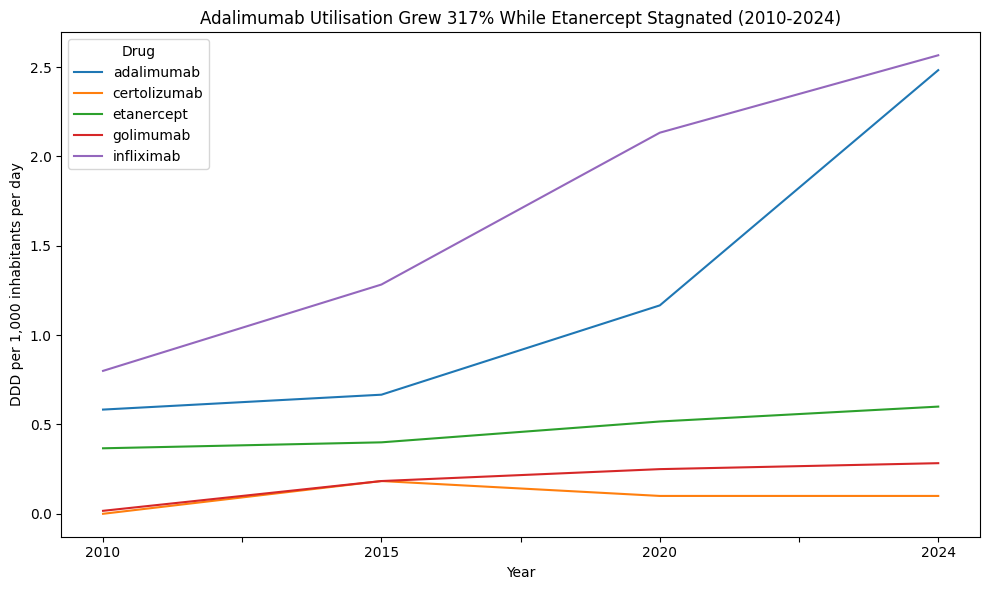

In [14]:
df_drugs = df_combined[df_combined['drug'] != 'all_tnf']
df_drug_trend = df_drugs.groupby('drug')[[2010, 2015, 2020, 2024]].mean()

df_drug_trend.T.plot(figsize=(10, 6))
plt.title('Adalimumab Utilisation Grew 317% While Etanercept Stagnated (2010-2024)')
plt.xlabel('Year')
plt.ylabel('DDD per 1,000 inhabitants per day')
plt.legend(title='Drug')
plt.tight_layout()
plt.savefig(folder_place / 'tnf_drug_trends.png')
plt.show()

### CHART 3. Adalimumab Utilisation Grew 317% While Etanercept Stagnated (2010–2024)

TNF inhibitor utilisation has shifted dramatically over 14 years.

**Key findings**

- **Adalimumab grew fastest** — from **0.6 DDD (2010)** to **2.5 DDD (2024)**, a **317% increase**.  
  The steepening between 2015 and 2020 is consistent with the **October 2018 Humira patent expiry**.  
  According to Amgros, Denmark achieved a **90% biosimilar switch within 3 weeks**, generating **~350 million DKK** in savings in 2019.  

- **Infliximab remains slightly ahead** but adalimumab has almost caught up.  
  Both are now near-equal utilisation leaders at **~2.5 DDD**.  

- **Etanercept stagnated** — minimal growth since 2010, losing relative market share.  

- **Golimumab and certolizumab never gained traction** — both remain below **0.3 DDD** in all observed years, together accounting for **<6%** of TNF utilisation.  

*Note:* This chart shows 4 time points (2010, 2015, 2020, 2024). The 2018 patent effect is inferred from the acceleration visible between 2015 and 2020.


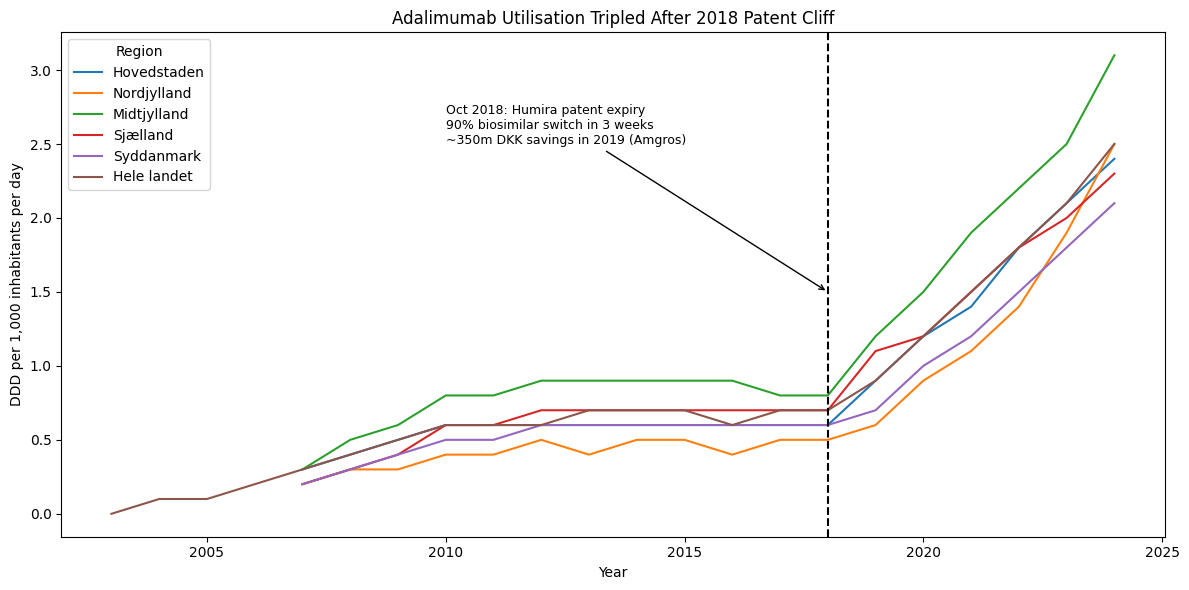

In [15]:
df_adalimumab = df_combined[df_combined['drug'] == 'adalimumab']
df_ada_plot = df_adalimumab.set_index('region').drop('drug', axis=1).T
df_ada_plot.index = df_ada_plot.index.astype(int)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
df_ada_plot.plot(ax=ax)
ax.axvline(x=2018, color='black', linestyle='--', linewidth=1.5)

# Add annotation
ax.annotate('Oct 2018: Humira patent expiry\n90% biosimilar switch in 3 weeks\n~350m DKK savings in 2019 (Amgros)',
            xy=(2018, 1.5), xytext=(2010, 2.5),
            fontsize=9, ha='left',
            arrowprops=dict(arrowstyle='->', color='black', lw=1))

ax.set_title('Adalimumab Utilisation Tripled After 2018 Patent Cliff')
ax.set_xlabel('Year')
ax.set_ylabel('DDD per 1,000 inhabitants per day')
ax.legend(title='Region')
plt.tight_layout()
plt.savefig(folder_place / 'adalimumab_patent_cliff.png')
plt.show()

### CHART 4. Adalimumab Utilisation Tripled After 2018 Patent Cliff

Adalimumab utilisation was largely flat across Danish regions up to 2018, with most regions hovering around **0.5–0.9 DDD**. After the October 2018 patent expiry, utilisation accelerates sharply in every region.

- National utilisation increased from **0.7 DDD (2018)** to **2.4 DDD (2024)** — a **243% increase in 6 years**.  
- According to Amgros, Denmark switched **~90%** of Humira use to biosimilars within **3 weeks** of the new agreement (November 2018), generating **~350 million DKK** in savings in 2019.  
- The price per DDD fell from **~288 kr** to **~40 kr** after biosimilar entry (Amgros Markedsovervågning Q4 2019).

**Key findings**

- **Clear before/after break:** The slope of all regional curves is much steeper after 2018, consistent with a strong post-patent uptake effect.  
- **Midtjylland as frontrunner:** Highest absolute growth, reaching **3.1 DDD** by 2024.  
- **Nordjylland catches up:** Starting as one of the lowest-use regions before 2018, Nordjylland closes much of the gap to the national average.  
- **Sjælland remains below average:** Although usage increases after 2018, Sjælland stays consistently under the national line, mirroring the equity patterns seen in the overall TNF analysis.

This demonstrates how **patent expiry and biosimilar competition** can rapidly expand patient access to expensive biologics — a key insight for healthcare policymakers and payers.
